<a href="https://colab.research.google.com/github/ZiadSakr5/ZezoSakr/blob/main/Copy_of_NLP_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [3]:
import pandas as pd

import pandas as pd
import zipfile
import os
import requests

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
print(test_df.head())


(20000, 6)
Training set: (1600000, 6)
     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (498, 6)
     target  id                          date     flag      user  \
0  positive   3  Mon May 11 03:17:40 UTC

/tmp/ipython-input-1703999249.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="target", palette="Set2")


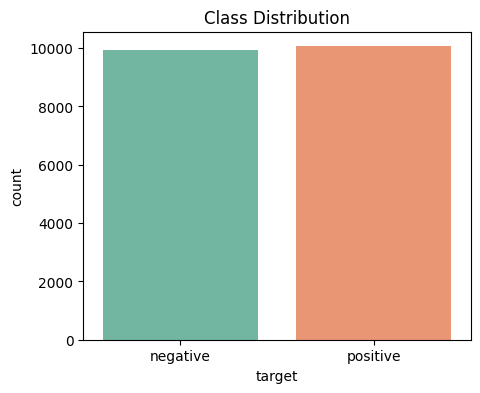

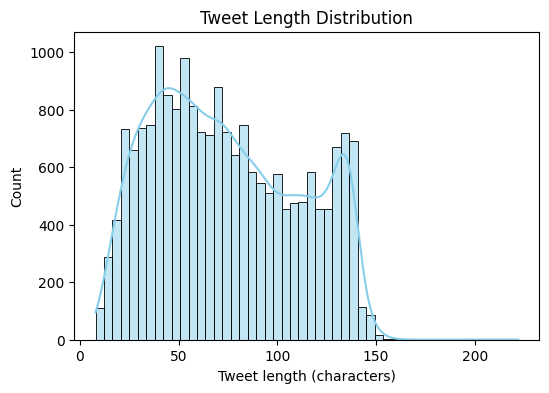

/tmp/ipython-input-1703999249.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tokens_df, x="count", y="token", palette="viridis")


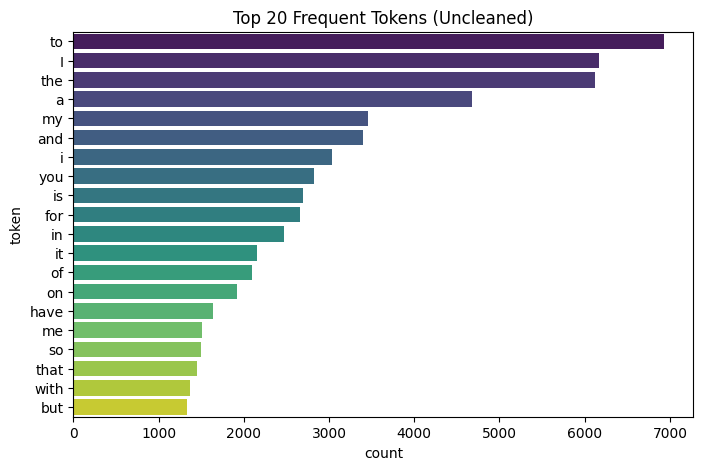


📌 Example Tweets:
- @chrishasboobs AHHH I HOPE YOUR OK!!! 
- @misstoriblack cool , i have no tweet apps  for my razr 2
- @TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
- School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
- upper airways problem 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

file_path = "training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

df["target"] = df["target"].map({0: "negative", 4: "positive"})

df = df.sample(20000, random_state=42).reset_index(drop=True)

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="target", palette="Set2")
plt.title("Class Distribution")
plt.show()

df["length"] = df["text"].apply(len)
plt.figure(figsize=(6,4))
sns.histplot(df["length"], bins=50, kde=True, color="skyblue")
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet length (characters)")
plt.show()

all_tokens = " ".join(df["text"]).split()
top_tokens = Counter(all_tokens).most_common(20)
tokens_df = pd.DataFrame(top_tokens, columns=["token", "count"])

plt.figure(figsize=(8,5))
sns.barplot(data=tokens_df, x="count", y="token", palette="viridis")
plt.title("Top 20 Frequent Tokens (Uncleaned)")
plt.show()

print("\n📌 Example Tweets:")
for t in df["text"].head(5):
    print("-", t)


In [5]:
import re

def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", " URL ", text)
    text = re.sub(r"@\w+", " USER ", text)
    text = re.sub(r"#\w+", " HASHTAG ", text)
    text = re.sub(r"[^\w\s.,!?]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Show before & after for 3 tweets
sample_tweets = df["text"].sample(3, random_state=42).tolist()
print("📌 Regex Cleaning Examples\n")
for tw in sample_tweets:
    print("Before:", tw)
    print("After :", clean_tweet(tw))
    print("-"*60)


📌 Regex Cleaning Examples

Before: cpr fail day, i turned it off instead of shocking the patient 
After : cpr fail day, i turned it off instead of shocking the patient
------------------------------------------------------------
Before: Laying in the bed because I just found out I've got to be up at 6am, yuck! Can't sleep though, bc of my nap earlier 
After : Laying in the bed because I just found out Ive got to be up at 6am, yuck! Cant sleep though, bc of my nap earlier
------------------------------------------------------------
Before: GRUMPY FUCK. i hate when people take there wee moods out on me. and i cant eat cookies cause my teeth 
After : GRUMPY FUCK. i hate when people take there wee moods out on me. and i cant eat cookies cause my teeth
------------------------------------------------------------


In [17]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

all_tokens_before = [tok for text in df["text"].str.lower() for tok in word_tokenize(text)]
vocab_before = set(all_tokens_before)

df["clean_text"] = df["text"].apply(clean_tweet).str.lower()
all_tokens_after = [tok for text in df["clean_text"] for tok in word_tokenize(text)]
vocab_after = set(all_tokens_after)

print("Vocabulary size BEFORE cleaning:", len(vocab_before))
print("Vocabulary size AFTER cleaning :", len(vocab_after))

example = df["clean_text"].iloc[0]
print("\n📌 Example Tokenization")
print("Tweet:", example)
print("Tokens:", word_tokenize(example))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vocabulary size BEFORE cleaning: 32105
Vocabulary size AFTER cleaning : 22354

📌 Example Tokenization
Tweet: user ahhh i hope your ok!!!
Tokens: ['user', 'ahhh', 'i', 'hope', 'your', 'ok', '!', '!', '!']


In [7]:
import string
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
punctuations = string.punctuation

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\d+", " <NUM> ", text)
    text = text.translate(str.maketrans("", "", punctuations))
    tokens = word_tokenize(text)
    tokens = [tok for tok in tokens if tok not in stop_words]
    return " ".join(tokens)

df["processed_text"] = df["clean_text"].apply(preprocess_text)

print("📌 Before:", df['clean_text'].iloc[0])
print("📌 After :", df['processed_text'].iloc[0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📌 Before: user ahhh i hope your ok!!!
📌 After : user ahhh hope ok


In [8]:
from nltk.stem import PorterStemmer
import spacy

stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")

sample_words = ["running", "better", "flies", "studies", "studying",
                "happier", "cities", "feet", "mice", "talking",
                "connected", "connections", "cars", "amazing",
                "beautiful", "easily", "went", "does", "geese", "saw"]

print(f"{'Word':<15}{'Stem':<15}{'Lemma':<15}")
print("="*45)

for word in sample_words:
    stem = stemmer.stem(word)
    lemma = nlp(word)[0].lemma_
    print(f"{word:<15}{stem:<15}{lemma:<15}")


Word           Stem           Lemma          
running        run            run            
better         better         well           
flies          fli            fly            
studies        studi          study          
studying       studi          study          
happier        happier        happy          
cities         citi           city           
feet           feet           foot           
mice           mice           mouse          
talking        talk           talk           
connected      connect        connect        
connections    connect        connection     
cars           car            car            
amazing        amaz           amazing        
beautiful      beauti         beautiful      
easily         easili         easily         
went           went           go             
does           doe            do             
geese          gees           geese          
saw            saw            see            


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df["stemmed"] = df["processed_text"].apply(lambda x: " ".join([stemmer.stem(w) for w in word_tokenize(x)]))
df["lemmatized"] = df["processed_text"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))

X_train, X_test, y_train, y_test = train_test_split(df["stemmed"], df["target"], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
acc_stem = accuracy_score(y_test, model.predict(X_test_vec))

X_train, X_test, y_train, y_test = train_test_split(df["lemmatized"], df["target"], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
acc_lemma = accuracy_score(y_test, model.predict(X_test_vec))

print("📌 Accuracy with stemming   :", acc_stem)
print("📌 Accuracy with lemmatization:", acc_lemma)


📌 Accuracy with stemming   : 0.74225
📌 Accuracy with lemmatization: 0.74325


In [10]:
def pos_counts(text):
    doc = nlp(text)
    noun_count = sum(1 for token in doc if token.pos_ == "NOUN")
    verb_count = sum(1 for token in doc if token.pos_ == "VERB")
    adj_count = sum(1 for token in doc if token.pos_ == "ADJ")
    return noun_count, verb_count, adj_count

df[["nouns", "verbs", "adjs"]] = df["lemmatized"].apply(lambda x: pd.Series(pos_counts(x)))

print(df[["lemmatized", "nouns", "verbs", "adjs"]].head())

from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

X_train, X_test, y_train, y_test = train_test_split(df[["lemmatized", "nouns", "verbs", "adjs"]],
                                                    df["target"], test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)

preprocessor = ColumnTransformer(
    transformers=[
        ("text", tfidf, "lemmatized"),
        ("pos", StandardScaler(), ["nouns", "verbs", "adjs"])
    ],
    remainder="drop"
)

pipeline = Pipeline([
    ("features", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("📌 Accuracy with POS features:", accuracy_score(y_test, y_pred))


                                          lemmatized  nouns  verbs  adjs
0                                  user ahhh hope ok      1      0     0
1                       user cool tweet app razr NUM      1      1     0
2  user know family drama lamehey next time u han...      8      2     2
3  school email will not open geography stuff rev...      5      2     1
4                               upper airway problem      2      0     1
📌 Accuracy with POS features: 0.743


In [23]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0

In [11]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim.downloader as api
import numpy as np

bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df["lemmatized"])

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["lemmatized"])

print("Loading Word2Vec embeddings (GoogleNews, may take time)...")
w2v = api.load("word2vec-google-news-300")  # 300-dim embeddings

def get_w2v_vector(text):
    words = [w for w in word_tokenize(text) if w in w2v]
    if len(words) == 0:
        return np.zeros(300)
    return np.mean([w2v[w] for w in words], axis=0)

X_w2v = np.vstack(df["lemmatized"].apply(get_w2v_vector).values)

print("BoW shape   :", X_bow.shape)
print("TF–IDF shape:", X_tfidf.shape)
print("Word2Vec shape:", X_w2v.shape)


Loading Word2Vec embeddings (GoogleNews, may take time)...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
BoW shape   : (20000, 5000)
TF–IDF shape: (20000, 5000)
Word2Vec shape: (20000, 300)


In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(df["lemmatized"], df["target"], test_size=0.2, random_state=42)

results = []

for name, vectorizer in [("BoW", CountVectorizer(max_features=5000)),
                         ("TFIDF", TfidfVectorizer(max_features=5000))]:
    for clf_name, clf in [("NaiveBayes", MultinomialNB()),
                          ("LogReg", LogisticRegression(max_iter=1000)),
                          ("LinearSVM", LinearSVC())]:
        pipe = Pipeline([
            ("vect", vectorizer),
            ("clf", clf)
        ])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, pos_label="positive")
        results.append([name, clf_name, acc, f1])

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, df["target"], test_size=0.2, random_state=42)

for clf_name, clf in [("LogReg", LogisticRegression(max_iter=1000)),
                      ("LinearSVM", LinearSVC())]:
    clf.fit(X_train_w2v, y_train_w2v)
    y_pred = clf.predict(X_test_w2v)
    acc = accuracy_score(y_test_w2v, y_pred)
    f1 = f1_score(y_test_w2v, y_pred, pos_label="positive")
    results.append(["Word2Vec", clf_name, acc, f1])

results_df = pd.DataFrame(results, columns=["Representation", "Model", "Accuracy", "F1-score"])
print(results_df)


  Representation       Model  Accuracy  F1-score
0            BoW  NaiveBayes   0.73600  0.742313
1            BoW      LogReg   0.73650  0.743427
2            BoW   LinearSVM   0.71725  0.722318
3          TFIDF  NaiveBayes   0.73625  0.741231
4          TFIDF      LogReg   0.74325  0.749695
5          TFIDF   LinearSVM   0.72700  0.732222
6       Word2Vec      LogReg   0.72700  0.733659
7       Word2Vec   LinearSVM   0.72525  0.731755


              precision    recall  f1-score   support

    negative      0.751     0.722     0.736      1987
    positive      0.736     0.764     0.750      2013

    accuracy                          0.743      4000
   macro avg      0.744     0.743     0.743      4000
weighted avg      0.744     0.743     0.743      4000



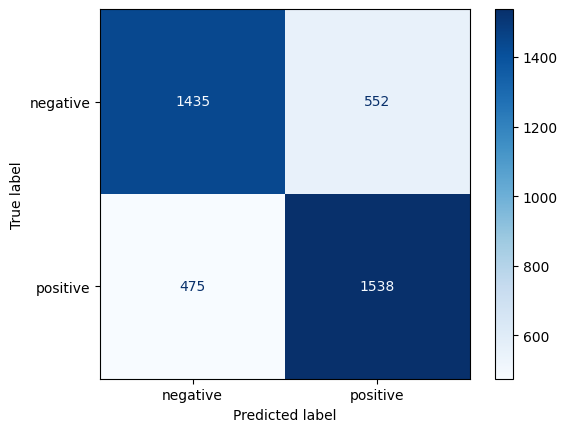


📌 Example Misclassified Tweets:
Tweet: add new zodiac sign wan na scorpio forever
True: negative | Predicted: positive
------------------------------------------------------------
Tweet: ooh ie NUM look kinda flasher NUM seem fair bit quick I m still go to stick ff
True: positive | Predicted: negative
------------------------------------------------------------
Tweet: user oku work I m go to check vampire news
True: positive | Predicted: negative
------------------------------------------------------------
Tweet: crave macha chocolate cake
True: negative | Predicted: positive
------------------------------------------------------------
Tweet: user
True: negative | Predicted: positive
------------------------------------------------------------
Tweet: gmorne twitt ready wknd first work tgif
True: negative | Predicted: positive
------------------------------------------------------------
Tweet: user zaru soba cold buckwheat noodle yummy dipping sauce anddd bento box japanese lunch box l

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

best_pipe = Pipeline([
    ("vect", TfidfVectorizer(max_features=5000)),
    ("clf", LogisticRegression(max_iter=1000))
])
best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=["negative", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "positive"])
disp.plot(cmap="Blues")
plt.show()

misclassified = X_test[y_test != y_pred]
y_true_mis = y_test[y_test != y_pred]
y_pred_mis = y_pred[y_test != y_pred]

print("\n📌 Example Misclassified Tweets:")
for i in range(10):
    print(f"Tweet: {misclassified.iloc[i]}")
    print(f"True: {y_true_mis.iloc[i]} | Predicted: {y_pred_mis[i]}")
    print("-"*60)


In [14]:
import joblib

joblib.dump(best_pipe, "sentiment_model.pkl")

print("✅ Model saved as sentiment_model.pkl")


✅ Model saved as sentiment_model.pkl


In [15]:
from google.colab import files
files.download("sentiment_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from flask import Flask, request, jsonify
import joblib

model = joblib.load("sentiment_model.pkl")

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    if "text" not in data:
        return jsonify({"error": "No text field provided"}), 400

    tweet = data["text"]
    prediction = model.predict([tweet])[0]
    return jsonify({"text": tweet, "prediction": prediction})

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


In [ ]:
!pip install flask ngrok
from flask import Flask
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def home():
    return "Flask Sentiment API is running!"

app.run()
